In [1]:
#imporing the Necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading the datasets

In [4]:
life_expectancy_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/life_expectancy.csv')
fertility_rate_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fertility_rate.csv')
country_population_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/country_population.csv')
country_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Metadata_Country.csv')

# Cleaning the dataset_1 - life_expectancy_data

In [5]:
df1=pd.DataFrame(life_expectancy_data)
df1.head()

Country Name Country Code                           Indicator Name  \
0        Aruba          ABW  Life expectancy at birth, total (years)   
1  Afghanistan          AFG  Life expectancy at birth, total (years)   
2       Angola          AGO  Life expectancy at birth, total (years)   
3      Albania          ALB  Life expectancy at birth, total (years)   
4      Andorra          AND  Life expectancy at birth, total (years)   

   Indicator Code    1960    1961    1962    1963    1964    1965  ...  \
0  SP.DYN.LE00.IN  65.662  66.074  66.444  66.787  67.113  67.435  ...   
1  SP.DYN.LE00.IN  32.292  32.742  33.185  33.624  34.060  34.495  ...   
2  SP.DYN.LE00.IN  33.251  33.573  33.914  34.272  34.645  35.031  ...   
3  SP.DYN.LE00.IN  62.279  63.298  64.187  64.911  65.461  65.848  ...   
4  SP.DYN.LE00.IN     NaN     NaN     NaN     NaN     NaN     NaN  ...   

     2007    2008    2009    2010    2011    2012    2013    2014    2015  \
0  74.576  74.725  74.872  75.016  75.158  75.299  75.440  75.582  75.725   
1  59.694  60.243  60.754  61.226  61.666  62.086  62.494  62.895  63.288   
2  55.096  56.189  57.231  58.192  59.042  59.770  60.373  60.858  61.241   
3  75.656  75.943  76.281  76.652  77.031  77.389  77.702  77.963  78.174   
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

     2016  
0  75.867  
1  63.673  
2  61.547  
3  78.345  
4     NaN  

[5 rows x 61 columns]

## Handling the Missing Values  for the life_expectancy_data

In [6]:
#Finding the no of missing values for the life_expectancy_data
df1.isnull().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
1960              29
                  ..
2012              17
2013              19
2014              19
2015              20
2016              19
Length: 61, dtype: int64

In [7]:
# Generating a list of column names from '1960' to '2016'
years_to_fill = [str(year) for year in range(1960, 2017)]

#Filling the missing values with the mean
for year in years_to_fill:
    mean_year = df1[year].mean()  # Calculate the mean of the column
    df1[year].fillna(mean_year, inplace=True)  # Fill missing values with the calculated mean


In [8]:
# Generating a list of column names from '1960' to '2016'
years_to_round = [str(year) for year in range(1960, 2017)]

#rounding off the decimal values

for year in years_to_round:
    df1[year] = df1[year].round(2)  # Round the values in each column to two decimal places


In [9]:
#verifying if the null values is been replaced
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

##  Checking for the duplicated_rows

In [10]:
df1.duplicated().sum()

0

## Checking the datatypes of the columns

In [11]:
df1.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
Length: 61, dtype: object

In [12]:
df1['Country Name'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding high income)',
       '

In [13]:
#Removing the row where the country name="Not classified"

not_classified=df1[df1['Country Name']== 'Not Classified'].index

df1=df1.drop(not_classified)

In [14]:
df1

Country Name Country Code                           Indicator Name  \
0           Aruba          ABW  Life expectancy at birth, total (years)   
1     Afghanistan          AFG  Life expectancy at birth, total (years)   
2          Angola          AGO  Life expectancy at birth, total (years)   
3         Albania          ALB  Life expectancy at birth, total (years)   
4         Andorra          AND  Life expectancy at birth, total (years)   
..            ...          ...                                      ...   
259        Kosovo          XKX  Life expectancy at birth, total (years)   
260   Yemen, Rep.          YEM  Life expectancy at birth, total (years)   
261  South Africa          ZAF  Life expectancy at birth, total (years)   
262        Zambia          ZMB  Life expectancy at birth, total (years)   
263      Zimbabwe          ZWE  Life expectancy at birth, total (years)   

     Indicator Code   1960   1961   1962   1963   1964   1965  ...   2007  \
0    SP.DYN.LE00.IN  65.66  66.07  66.44  66.79  67.11  67.44  ...  74.58   
1    SP.DYN.LE00.IN  32.29  32.74  33.18  33.62  34.06  34.49  ...  59.69   
2    SP.DYN.LE00.IN  33.25  33.57  33.91  34.27  34.65  35.03  ...  55.10   
3    SP.DYN.LE00.IN  62.28  63.30  64.19  64.91  65.46  65.85  ...  75.66   
4    SP.DYN.LE00.IN  53.37  53.92  54.31  54.69  55.18  55.67  ...  69.16   
..              ...    ...    ...    ...    ...    ...    ...  ...    ...   
259  SP.DYN.LE00.IN  53.37  53.92  54.31  54.69  55.18  55.67  ...  69.20   
260  SP.DYN.LE00.IN  34.36  34.47  34.74  35.19  35.82  36.60  ...  62.55   
261  SP.DYN.LE00.IN  52.22  52.56  52.89  53.23  53.57  53.93  ...  53.01   
262  SP.DYN.LE00.IN  45.12  45.50  45.87  46.22  46.57  46.93  ...  52.31   
263  SP.DYN.LE00.IN  51.56  51.94  52.30  52.65  52.99  53.32  ...  47.72   

      2008   2009   2010   2011   2012   2013   2014   2015   2016  
0    74.72  74.87  75.02  75.16  75.30  75.44  75.58  75.72  75.87  
1    60.24  60.75  61.23  61.67  62.09  62.49  62.90  63.29  63.67  
2    56.19  57.23  58.19  59.04  59.77  60.37  60.86  61.24  61.55  
3    75.94  76.28  76.65  77.03  77.39  77.70  77.96  78.17  78.34  
4    69.54  69.93  70.28  70.63  70.99  71.23  71.55  71.75  71.99  
..     ...    ...    ...    ...    ...    ...    ...    ...    ...  
259  69.40  69.65  69.90  70.15  70.50  70.80  71.10  71.35  71.65  
260  62.89  63.21  63.51  63.79  64.05  64.29  64.52  64.74  64.95  
261  53.72  54.70  55.89  57.20  58.54  59.83  60.99  61.98  62.77  
262  53.75  55.19  56.59  57.87  59.01  59.98  60.78  61.40  61.87  
263  49.34  51.12  52.98  54.80  56.52  58.05  59.36  60.40  61.16  

[264 rows x 61 columns]

In [15]:
df1['Country Code'].unique()

array(['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARB', 'ARE', 'ARG', 'ARM',
       'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA',
       'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL',
       'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CEB', 'CHE',
       'CHI', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM',
       'CPV', 'CRI', 'CSS', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU',
       'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'EAP', 'EAR', 'EAS', 'ECA',
       'ECS', 'ECU', 'EGY', 'EMU', 'ERI', 'ESP', 'EST', 'ETH', 'EUU',
       'FCS', 'FIN', 'FJI', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO',
       'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL',
       'GTM', 'GUM', 'GUY', 'HIC', 'HKG', 'HND', 'HPC', 'HRV', 'HTI',
       'HUN', 'IBD', 'IBT', 'IDA', 'IDB', 'IDN', 'IDX', 'IMN', 'IND',
       'INX', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR',
       'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT',
       'LAC', 'LAO',

In [16]:
df1['Indicator Code'].nunique()

1

In [17]:
df1['Indicator Name'].unique()

array(['Life expectancy at birth, total (years)'], dtype=object)

In [18]:
#Dropping the Indicator Code column
df1.drop('Indicator Code', axis=1, inplace=True)

In [19]:
#Dropping the Indicator Name column
df1.drop('Indicator Name' , axis =1 ,inplace =True)

In [20]:
df1.head()

Country Name Country Code   1960   1961   1962   1963   1964   1965   1966  \
0        Aruba          ABW  65.66  66.07  66.44  66.79  67.11  67.44  67.76   
1  Afghanistan          AFG  32.29  32.74  33.18  33.62  34.06  34.49  34.93   
2       Angola          AGO  33.25  33.57  33.91  34.27  34.65  35.03  35.43   
3      Albania          ALB  62.28  63.30  64.19  64.91  65.46  65.85  66.11   
4      Andorra          AND  53.37  53.92  54.31  54.69  55.18  55.67  56.14   

    1967  ...   2007   2008   2009   2010   2011   2012   2013   2014   2015  \
0  68.10  ...  74.58  74.72  74.87  75.02  75.16  75.30  75.44  75.58  75.72   
1  35.36  ...  59.69  60.24  60.75  61.23  61.67  62.09  62.49  62.90  63.29   
2  35.83  ...  55.10  56.19  57.23  58.19  59.04  59.77  60.37  60.86  61.24   
3  66.30  ...  75.66  75.94  76.28  76.65  77.03  77.39  77.70  77.96  78.17   
4  56.56  ...  69.16  69.54  69.93  70.28  70.63  70.99  71.23  71.55  71.75   

    2016  
0  75.87  
1  63.67  
2  61.55  
3  78.34  
4  71.99  

[5 rows x 59 columns]

# Cleaning the dataset2 - Fertility_rate_data

In [21]:
df2=pd.DataFrame(fertility_rate_data)
df2.head()

Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  Fertility rate, total (births per woman)   
1  Afghanistan          AFG  Fertility rate, total (births per woman)   
2       Angola          AGO  Fertility rate, total (births per woman)   
3      Albania          ALB  Fertility rate, total (births per woman)   
4      Andorra          AND  Fertility rate, total (births per woman)   

   Indicator Code   1960   1961   1962   1963   1964   1965  ...   2007  \
0  SP.DYN.TFRT.IN  4.820  4.655  4.471  4.271  4.059  3.842  ...  1.763   
1  SP.DYN.TFRT.IN  7.450  7.450  7.450  7.450  7.450  7.450  ...  6.460   
2  SP.DYN.TFRT.IN  7.478  7.524  7.563  7.592  7.611  7.619  ...  6.368   
3  SP.DYN.TFRT.IN  6.489  6.401  6.282  6.133  5.960  5.773  ...  1.668   
4  SP.DYN.TFRT.IN    NaN    NaN    NaN    NaN    NaN    NaN  ...  1.180   

    2008   2009   2010   2011   2012   2013   2014   2015   2016  
0  1.764  1.769  1.776  1.783  1.791  1.796  1.800  1.801  1.800  
1  6.254  6.038  5.816  5.595  5.380  5.174  4.981  4.802  4.635  
2  6.307  6.238  6.162  6.082  6.000  5.920  5.841  5.766  5.694  
3  1.650  1.646  1.653  1.668  1.685  1.700  1.710  1.714  1.713  
4  1.250  1.190  1.270    NaN    NaN    NaN    NaN    NaN    NaN  

[5 rows x 61 columns]

In [22]:
#Removing the row where the country name  is "Not classified"

not_classified=df2[df2['Country Name']== 'Not Classified'].index

df2=df2.drop(not_classified)

## Handling the Missing Values for the fertility_rate_data¶

In [23]:
#Finding the no of missing values for the fertility_rate_data
df2.isnull().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
1960              28
                  ..
2012              16
2013              18
2014              18
2015              17
2016              18
Length: 61, dtype: int64

In [24]:
# Generating a list of column names from '1960' to '2016'
years_to_fill = [str(year) for year in range(1960, 2017)]

#Filling the missing values with the mean
for year in years_to_fill:
    mean_year = df2[year].mean()  # Calculate the mean of the column
    df2[year].fillna(mean_year, inplace=True)  # Fill missing values with the calculated mean


In [25]:
# Generating a list of column names from '1960' to '2016'
years_to_round = [str(year) for year in range(1960, 2017)]

#rounding off the decimal values

for year in years_to_round:
    df2[year] = df2[year].round(2)  # Round the values in each column to two decimal places


In [26]:
#verifying if the null values is been replaced
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

##  Checking for the duplicated_rows

In [27]:
df2.duplicated().sum()

0

## Checking the datatypes of the columns

In [28]:
df2.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
Length: 61, dtype: object

In [29]:
#Dropping the Indicator Code column
df2.drop('Indicator Code', axis=1, inplace=True)

#Dropping the Indicator Name column
df2.drop('Indicator Name' , axis =1 ,inplace =True)

In [30]:
df2.head()

Country Name Country Code  1960  1961  1962  1963  1964  1965  1966  1967  \
0        Aruba          ABW  4.82  4.66  4.47  4.27  4.06  3.84  3.62  3.42   
1  Afghanistan          AFG  7.45  7.45  7.45  7.45  7.45  7.45  7.45  7.45   
2       Angola          AGO  7.48  7.52  7.56  7.59  7.61  7.62  7.62  7.61   
3      Albania          ALB  6.49  6.40  6.28  6.13  5.96  5.77  5.58  5.39   
4      Andorra          AND  5.51  5.49  5.50  5.50  5.46  5.42  5.37  5.33   

   ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  
0  ...  1.76  1.76  1.77  1.78  1.78  1.79  1.80  1.80  1.80  1.80  
1  ...  6.46  6.25  6.04  5.82  5.60  5.38  5.17  4.98  4.80  4.64  
2  ...  6.37  6.31  6.24  6.16  6.08  6.00  5.92  5.84  5.77  5.69  
3  ...  1.67  1.65  1.65  1.65  1.67  1.68  1.70  1.71  1.71  1.71  
4  ...  1.18  1.25  1.19  1.27  2.88  2.84  2.82  2.79  2.76  2.73  

[5 rows x 59 columns]

# Cleaning the dataset3 - country_population_data

In [31]:
df3=pd.DataFrame(country_population_data)
df3.head()

Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54211.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8996351.0   
2       Angola          AGO  Population, total    SP.POP.TOTL  5643182.0   
3      Albania          ALB  Population, total    SP.POP.TOTL  1608800.0   
4      Andorra          AND  Population, total    SP.POP.TOTL    13411.0   

        1961       1962       1963       1964       1965  ...        2007  \
0    55438.0    56225.0    56695.0    57032.0    57360.0  ...    101220.0   
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0  ...  26616792.0   
2  5753024.0  5866061.0  5980417.0  6093321.0  6203299.0  ...  20997687.0   
3  1659800.0  1711319.0  1762621.0  1814135.0  1864791.0  ...   2970017.0   
4    14375.0    15370.0    16412.0    17469.0    18549.0  ...     82683.0   

         2008        2009        2010        2011        2012        2013  \
0    101353.0    101453.0    101669.0    102053.0    102577.0    103187.0   
1  27294031.0  28004331.0  28803167.0  29708599.0  30696958.0  31731688.0   
2  21759420.0  22549547.0  23369131.0  24218565.0  25096150.0  25998340.0   
3   2947314.0   2927519.0   2913021.0   2905195.0   2900401.0   2895092.0   
4     83861.0     84462.0     84449.0     83751.0     82431.0     80788.0   

         2014        2015        2016  
0    103795.0    104341.0    104822.0  
1  32758020.0  33736494.0  34656032.0  
2  26920466.0  27859305.0  28813463.0  
3   2889104.0   2880703.0   2876101.0  
4     79223.0     78014.0     77281.0  

[5 rows x 61 columns]

In [32]:
#Removing the row where the country name="Not classified"

not_classified=df3[df3['Country Name']== 'Not Classified'].index

df3=df3.drop(not_classified)

## Handling the Missing Values for the country_population_data¶

In [33]:
#Finding the no of missing values
df3.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2012              2
2013              2
2014              2
2015              2
2016              2
Length: 61, dtype: int64

In [34]:
# Generating a list of column names from '1960' to '2016'
years_to_fill = [str(year) for year in range(1960, 2017)]

#Filling the missing values with the median
for year in years_to_fill:
    median_year = df3[year].median()  # Calculate the mean of the column
    df3[year].fillna(median_year, inplace=True)  # Fill missing values with the calculated mean


In [35]:
# Generating a list of column names from '1960' to '2016'
years_to_round = [str(year) for year in range(1960, 2017)]

#rounding off the decimal values

for year in years_to_round:
    df3[year] = df3[year].round(2)  # Round the values in each column to two decimal places


In [36]:
#verifying if the null values is been replaced
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

## Checking for the duplicated_rows¶

In [37]:
df3.duplicated().sum()

0

## Checking the datatypes of the columns

In [38]:
df3.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
Length: 61, dtype: object

In [39]:
#Dropping the Indicator Code column
df3.drop('Indicator Code', axis=1, inplace=True)

#Dropping the Indicator Name column
df3.drop('Indicator Name' , axis =1 ,inplace =True)

In [40]:
df3.head()

Country Name Country Code       1960       1961       1962       1963  \
0        Aruba          ABW    54211.0    55438.0    56225.0    56695.0   
1  Afghanistan          AFG  8996351.0  9166764.0  9345868.0  9533954.0   
2       Angola          AGO  5643182.0  5753024.0  5866061.0  5980417.0   
3      Albania          ALB  1608800.0  1659800.0  1711319.0  1762621.0   
4      Andorra          AND    13411.0    14375.0    15370.0    16412.0   

        1964       1965        1966        1967  ...        2007        2008  \
0    57032.0    57360.0     57715.0     58055.0  ...    101220.0    101353.0   
1  9731361.0  9938414.0  10152331.0  10372630.0  ...  26616792.0  27294031.0   
2  6093321.0  6203299.0   6309770.0   6414995.0  ...  20997687.0  21759420.0   
3  1814135.0  1864791.0   1914573.0   1965598.0  ...   2970017.0   2947314.0   
4    17469.0    18549.0     19647.0     20758.0  ...     82683.0     83861.0   

         2009        2010        2011        2012        2013        2014  \
0    101453.0    101669.0    102053.0    102577.0    103187.0    103795.0   
1  28004331.0  28803167.0  29708599.0  30696958.0  31731688.0  32758020.0   
2  22549547.0  23369131.0  24218565.0  25096150.0  25998340.0  26920466.0   
3   2927519.0   2913021.0   2905195.0   2900401.0   2895092.0   2889104.0   
4     84462.0     84449.0     83751.0     82431.0     80788.0     79223.0   

         2015        2016  
0    104341.0    104822.0  
1  33736494.0  34656032.0  
2  27859305.0  28813463.0  
3   2880703.0   2876101.0  
4     78014.0     77281.0  

[5 rows x 59 columns]

# Cleaning the dataset4-metadata_country

In [41]:
df4=pd.DataFrame(country_data)
df4.head()

Country Code                     Region          IncomeGroup  \
0          ABW  Latin America & Caribbean          High income   
1          AFG                 South Asia           Low income   
2          AGO         Sub-Saharan Africa  Lower middle income   
3          ALB      Europe & Central Asia  Upper middle income   
4          AND      Europe & Central Asia          High income   

                                        SpecialNotes    TableName  Unnamed: 5  
0  SNA data for 2000-2011 are updated from offici...        Aruba         NaN  
1  Fiscal year end: March 20; reporting period fo...  Afghanistan         NaN  
2                                                NaN       Angola         NaN  
3                                                NaN      Albania         NaN  
4  WB-3 code changed from ADO to AND to align wit...      Andorra         NaN

In [42]:
# Removing the column 'Special notes'
df4 = df4.drop('SpecialNotes', axis=1)


In [43]:
# Removing the last column
df4 = df4.iloc[:, :-1]


In [44]:
df4.head(2)

Country Code                     Region  IncomeGroup    TableName
0          ABW  Latin America & Caribbean  High income        Aruba
1          AFG                 South Asia   Low income  Afghanistan

# Melting the Dataframes

In [45]:
# Melting the life expectancy dataframe to reshape the years into a single 'Year' column
life_expectancy_melted = df1.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Life Expectancy')


In [46]:
# Melting the fertility rate dataframe
fertility_rate_melted = df2.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Fertility Rate')


In [47]:
# Melting the population dataframe
population_melted = df3.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Population')

# Merging the Dataframes

In [48]:
# Merging life expectancy with fertility rate based on 'Country Name', 'Country Code', and 'Year'
merged_df = pd.merge(life_expectancy_melted, fertility_rate_melted, on=['Country Name', 'Country Code', 'Year'])

In [49]:
# Merging the combined dataframe with population data based on 'Country Name', 'Country Code', and 'Year'
merged_df = pd.merge(merged_df, population_melted, on=['Country Name', 'Country Code', 'Year'])

In [50]:
# Merging the metadata information based on 'Country Code'
final_df = pd.merge(merged_df, df4, on='Country Code')


In [51]:
# Reordering columns to match the desired order
final_columns_order = [
    'Country Name', 'Country Code', 'Year',
    'Life Expectancy', 'Fertility Rate', 'Population',
    'Region', 'IncomeGroup'
]

final_df = final_df[final_columns_order]

In [52]:
final_df

Country Name Country Code  Year  Life Expectancy  Fertility Rate  \
0            Aruba          ABW  1960            65.66            4.82   
1            Aruba          ABW  1961            66.07            4.66   
2            Aruba          ABW  1962            66.44            4.47   
3            Aruba          ABW  1963            66.79            4.27   
4            Aruba          ABW  1964            67.11            4.06   
...            ...          ...   ...              ...             ...   
14986     Zimbabwe          ZWE  2012            56.52            4.00   
14987     Zimbabwe          ZWE  2013            58.05            3.96   
14988     Zimbabwe          ZWE  2014            59.36            3.90   
14989     Zimbabwe          ZWE  2015            60.40            3.84   
14990     Zimbabwe          ZWE  2016            61.16            3.76   

       Population                     Region  IncomeGroup  
0         54211.0  Latin America & Caribbean  High income  
1         55438.0  Latin America & Caribbean  High income  
2         56225.0  Latin America & Caribbean  High income  
3         56695.0  Latin America & Caribbean  High income  
4         57032.0  Latin America & Caribbean  High income  
...           ...                        ...          ...  
14986  14710826.0         Sub-Saharan Africa   Low income  
14987  15054506.0         Sub-Saharan Africa   Low income  
14988  15411675.0         Sub-Saharan Africa   Low income  
14989  15777451.0         Sub-Saharan Africa   Low income  
14990  16150362.0         Sub-Saharan Africa   Low income  

[14991 rows x 8 columns]

# Exploring Fertility Rates and Life Expectancy Over Time

In [53]:
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode()

Output hidden; open in https://colab.research.google.com to view.

In [54]:
fig=px.scatter(final_df,
           x="Fertility Rate",
           y="Life Expectancy",
           size="Population",
           color="Region",
           template='plotly_dark',
           color_discrete_sequence=px.colors.qualitative.Plotly,
           animation_frame="Year",
           animation_group="Country Name",
           title="Life Expectancy Vs Fertility Rate",
           hover_name='Country Name',
           labels={'Region':'Region'},
           range_x=[0,10],
           range_y=[25,95],
           height=600,
           size_max=100
          )
# Axis titles
fig.update_layout(xaxis_title='Total Fertility Rate (Children per Woman)', yaxis_title='Life Expectancy at Birth (Years)')

# Saving the scatter plot as an HTML file
fig.write_html('Fert _vs_LifeExp_output.html')

#displaying the plot
fig.show()


In [55]:
#saving the final_df file
final_df.to_csv('final_data.csv', index=False)  # Saves DataFrame to a CSV file without index

# Population Trends (Years vs Population)(Line Graph)


In [56]:
#storing the population data in the temp_pop variable
temp_pop = country_population_data

In [57]:
temp_pop.head(2)

Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54211.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8996351.0   

        1961       1962       1963       1964       1965  ...        2007  \
0    55438.0    56225.0    56695.0    57032.0    57360.0  ...    101220.0   
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0  ...  26616792.0   

         2008        2009        2010        2011        2012        2013  \
0    101353.0    101453.0    101669.0    102053.0    102577.0    103187.0   
1  27294031.0  28004331.0  28803167.0  29708599.0  30696958.0  31731688.0   

         2014        2015        2016  
0    103795.0    104341.0    104822.0  
1  32758020.0  33736494.0  34656032.0  

[2 rows x 61 columns]

In [58]:
#Removing the some columns
temp_pop.drop(columns=['Country Name','Country Code', 'Indicator Name', 'Indicator Code'],axis =1, inplace=True)

In [59]:
#Total_Population
pop_sum=temp_pop.sum()
pop_sum=pd.DataFrame(pop_sum).reset_index()
pop_sum.columns= ['Year','Total Population']
pop_sum

Year  Total Population
0   1960      3.072052e+10
1   1961      3.113369e+10
2   1962      3.168550e+10
3   1963      3.237204e+10
4   1964      3.306404e+10
5   1965      3.377327e+10
6   1966      3.452025e+10
7   1967      3.526591e+10
8   1968      3.602484e+10
9   1969      3.682082e+10
10  1970      3.762852e+10
11  1971      3.845576e+10
12  1972      3.927555e+10
13  1973      4.009001e+10
14  1974      4.090685e+10
15  1975      4.170800e+10
16  1976      4.249554e+10
17  1977      4.327978e+10
18  1978      4.407752e+10
19  1979      4.489408e+10
20  1980      4.572080e+10
21  1981      4.656924e+10
22  1982      4.745147e+10
23  1983      4.834380e+10
24  1984      4.923511e+10
25  1985      5.014381e+10
26  1986      5.107938e+10
27  1987      5.203901e+10
28  1988      5.300910e+10
29  1989      5.397983e+10
30  1990      5.497076e+10
31  1991      5.592142e+10
32  1992      5.684924e+10
33  1993      5.778027e+10
34  1994      5.870018e+10
35  1995      5.962372e+10
36  1996      6.053121e+10
37  1997      6.144000e+10
38  1998      6.233785e+10
39  1999      6.322568e+10
40  2000      6.410484e+10
41  2001      6.498277e+10
42  2002      6.585750e+10
43  2003      6.673711e+10
44  2004      6.762267e+10
45  2005      6.851486e+10
46  2006      6.941319e+10
47  2007      7.031702e+10
48  2008      7.123435e+10
49  2009      7.215996e+10
50  2010      7.309104e+10
51  2011      7.401844e+10
52  2012      7.496522e+10
53  2013      7.592956e+10
54  2014      7.690154e+10
55  2015      7.787561e+10
56  2016      7.885679e+10

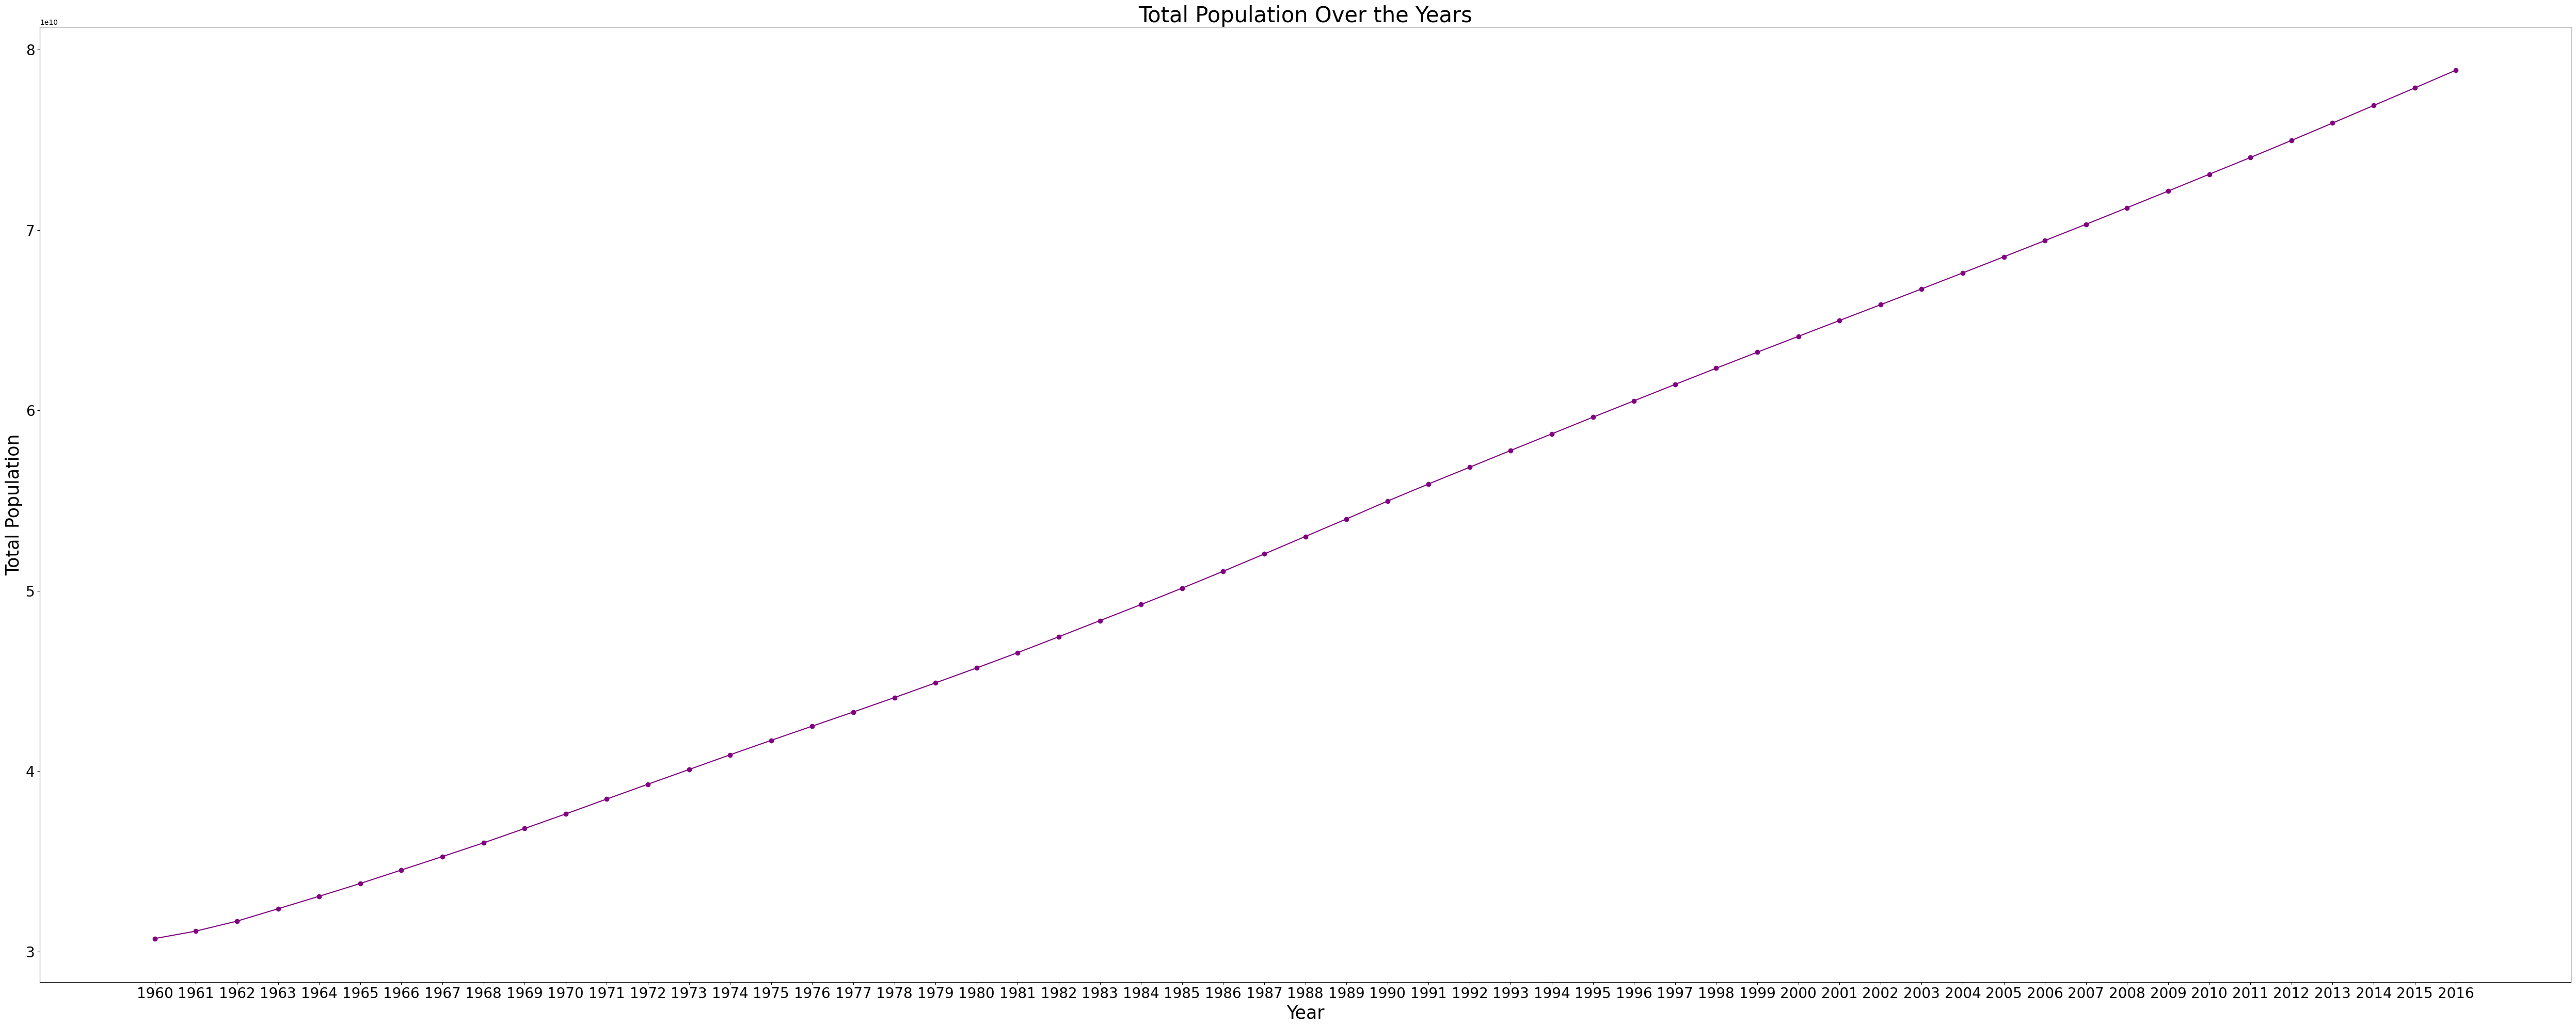

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 20))  # Set the figure size


# Plotting the line graph for total population over years
plt.plot(pop_sum['Year'], pop_sum['Total Population'], marker='o', linestyle='-', color='purple')

# Setting title with increased font size
plt.title('Total Population Over the Years', fontsize=30)

# Setting x-axis and y-axis labels with increased font size
plt.xlabel('Year', fontsize=25)
plt.ylabel('Total Population', fontsize=25)

# Setting x-axis and y-axis ticks with increased font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()  # Displaying the plot


# Life expectancy variation

In [61]:
#storing the life_expectancy data in  temp_life variable
temp_life=life_expectancy_data
temp_life.head(2)

Country Name Country Code                           Indicator Name  \
0        Aruba          ABW  Life expectancy at birth, total (years)   
1  Afghanistan          AFG  Life expectancy at birth, total (years)   

   Indicator Code   1960   1961   1962   1963   1964   1965  ...   2007  \
0  SP.DYN.LE00.IN  65.66  66.07  66.44  66.79  67.11  67.44  ...  74.58   
1  SP.DYN.LE00.IN  32.29  32.74  33.18  33.62  34.06  34.49  ...  59.69   

    2008   2009   2010   2011   2012   2013   2014   2015   2016  
0  74.72  74.87  75.02  75.16  75.30  75.44  75.58  75.72  75.87  
1  60.24  60.75  61.23  61.67  62.09  62.49  62.90  63.29  63.67  

[2 rows x 61 columns]

In [62]:
#Deleting the unwanted columns
temp_life.drop(['Country Name','Country Code','Indicator Name', 'Indicator Code'],axis =1, inplace = True)
new_life = temp_life.dropna()

In [63]:
#Displaying the new_life data
new_life.head()

1960   1961   1962   1963   1964   1965   1966   1967   1968   1969  ...  \
0  65.66  66.07  66.44  66.79  67.11  67.44  67.76  68.10  68.44  68.78  ...   
1  32.29  32.74  33.18  33.62  34.06  34.49  34.93  35.36  35.80  36.23  ...   
2  33.25  33.57  33.91  34.27  34.65  35.03  35.43  35.83  36.23  36.64  ...   
3  62.28  63.30  64.19  64.91  65.46  65.85  66.11  66.30  66.48  66.69  ...   
4  53.37  53.92  54.31  54.69  55.18  55.67  56.14  56.56  56.96  57.34  ...   

    2007   2008   2009   2010   2011   2012   2013   2014   2015   2016  
0  74.58  74.72  74.87  75.02  75.16  75.30  75.44  75.58  75.72  75.87  
1  59.69  60.24  60.75  61.23  61.67  62.09  62.49  62.90  63.29  63.67  
2  55.10  56.19  57.23  58.19  59.04  59.77  60.37  60.86  61.24  61.55  
3  75.66  75.94  76.28  76.65  77.03  77.39  77.70  77.96  78.17  78.34  
4  69.16  69.54  69.93  70.28  70.63  70.99  71.23  71.55  71.75  71.99  

[5 rows x 57 columns]

In [64]:
#Calculating the mean life_expectancy by year
life_mean =  new_life.mean()


In [65]:
#Converting life_mean to DataFrame
life_mean = pd.DataFrame(life_mean).reset_index()
life_mean.columns= ['Year', 'Life expectancy']

In [66]:
life_mean.head()

Year  Life expectancy
0  1960        53.367311
1  1961        53.919848
2  1962        54.313220
3  1963        54.691402
4  1964        55.182992

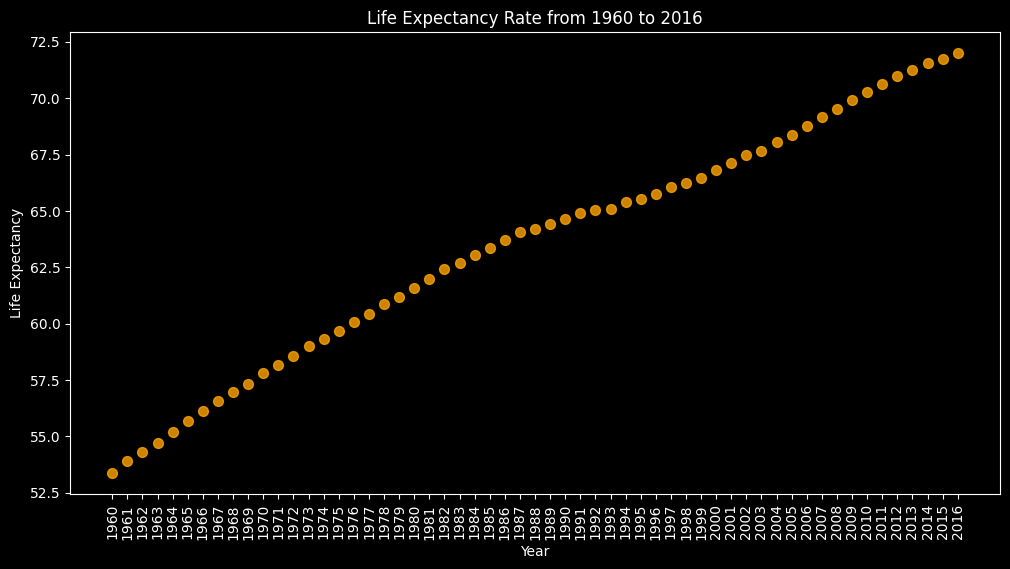

In [67]:
import matplotlib.pyplot as plt

# Activating the 'dark_background' style
plt.style.use('dark_background')

plt.figure(figsize=(12, 6))
plt.scatter(life_mean['Year'], life_mean['Life expectancy'], color='orange', s=50, alpha=0.8)
plt.xticks(rotation=90)
plt.title('Life Expectancy Rate from 1960 to 2016')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()


In [68]:
# Saving the plot as an image file
plt.savefig('life_expectancy_scatter.png')

<Figure size 640x480 with 0 Axes>

# Correlation Analysis

In [69]:
selected_columns = ['Life Expectancy', 'Fertility Rate', 'Population']
correlation_data = final_df[selected_columns]

# Calculating the Pearson correlation matrix
correlation_matrix = correlation_data.corr()

print(correlation_matrix)

                 Life Expectancy  Fertility Rate  Population
Life Expectancy         1.000000       -0.862794    0.028954
Fertility Rate         -0.862794        1.000000   -0.093295
Population              0.028954       -0.093295    1.000000


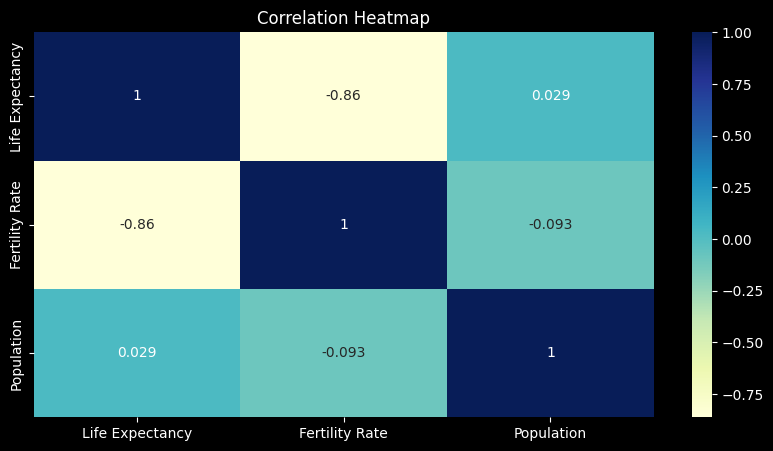

In [70]:
# Plotting the heatmap for correlation analysis

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

In [71]:
# Saving the heatmap as an image file (e.g., PNG, JPG, PDF, etc.)
plt.savefig('correlation_heatmap.png')

<Figure size 640x480 with 0 Axes>

# Regional Analysis


<ipython-input-72-7bd6c505b1ab>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



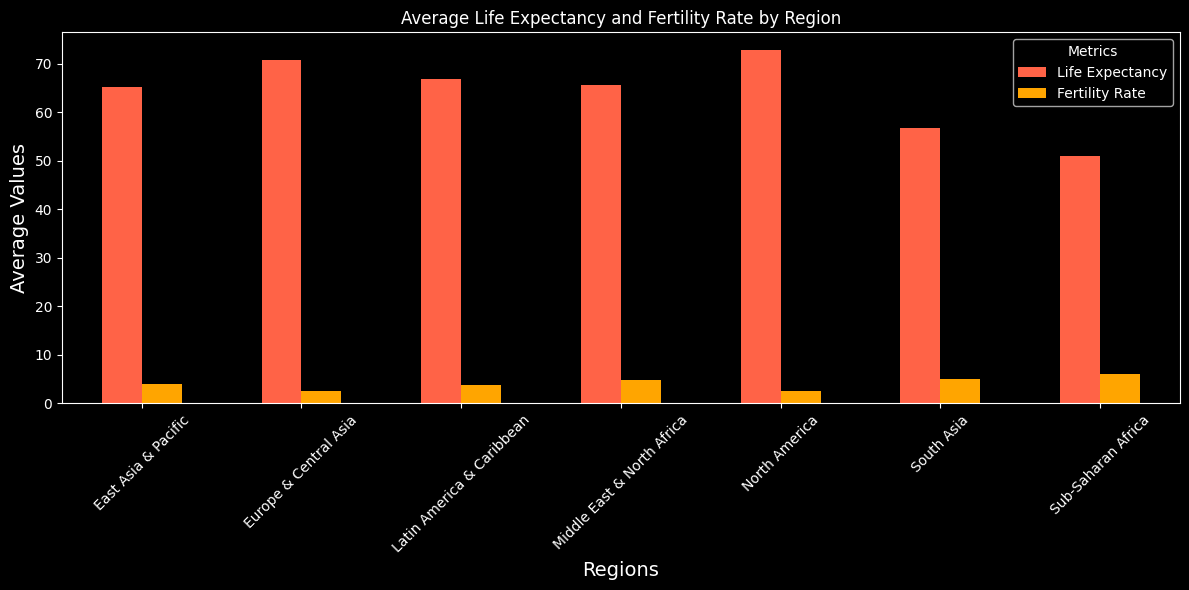

In [72]:
# Grouping the data by 'Region' and calculating the mean values
region_means = final_df.groupby('Region').mean()[['Life Expectancy', 'Fertility Rate']]


# Define custom colors for each bar
colors = ['#FF6347', '#FFA500']

# Plotting the bar chart and specifying colors
region_means.plot(kind='bar', figsize=(12, 6), color=colors)
plt.title('Average Life Expectancy and Fertility Rate by Region')
plt.xlabel('Regions',fontsize=14)
plt.ylabel('Average Values',fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

In [73]:
# Saving the bar chart as an image file (e.g., PNG, JPG, PDF, etc.)
plt.savefig('region_means_bar_chart.png')

<Figure size 640x480 with 0 Axes>

# Population Trends Across regions -using Race Bar plot

In [74]:
# Creating subset_df with 'Region' column and setting the index to 'Year'
subset_df = final_df[['Region', 'Year', 'Population']].copy()
subset_df['Year'] = subset_df['Year'].astype(str)
subset_df.set_index('Year', inplace=True)



In [75]:
# Using pivot_table to reshape the DataFrame
subset_df = subset_df.pivot_table(values='Population', index='Year', columns='Region')
subset_df = subset_df.rename_axis(None, axis=1)
subset_df


East Asia & Pacific  Europe & Central Asia  Latin America & Caribbean  \
Year                                                                          
1960         2.781980e+07           1.145358e+07               5.335814e+06   
1961         2.790609e+07           1.158711e+07               5.483302e+06   
1962         2.828631e+07           1.172556e+07               5.636593e+06   
1963         2.897176e+07           1.186527e+07               5.794201e+06   
1964         2.964731e+07           1.200371e+07               5.954542e+06   
1965         3.035138e+07           1.213769e+07               6.116218e+06   
1966         3.114807e+07           1.225406e+07               6.278672e+06   
1967         3.191891e+07           1.236725e+07               6.442771e+06   
1968         3.270054e+07           1.247611e+07               6.608961e+06   
1969         3.357666e+07           1.258314e+07               6.777972e+06   
1970         3.445267e+07           1.268104e+07               6.949660e+06   
1971         3.535427e+07           1.277959e+07               7.124804e+06   
1972         3.620684e+07           1.288779e+07               7.302701e+06   
1973         3.701691e+07           1.299346e+07               7.483117e+06   
1974         3.782218e+07           1.309542e+07               7.665440e+06   
1975         3.854705e+07           1.319317e+07               7.848224e+06   
1976         3.919288e+07           1.328886e+07               8.032791e+06   
1977         3.980275e+07           1.338125e+07               8.219810e+06   
1978         4.041043e+07           1.347239e+07               8.407902e+06   
1979         4.102931e+07           1.356398e+07               8.597876e+06   
1980         4.163616e+07           1.365889e+07               8.790099e+06   
1981         4.226587e+07           1.375163e+07               8.984893e+06   
1982         4.295770e+07           1.383570e+07               9.181794e+06   
1983         4.364955e+07           1.391647e+07               9.380161e+06   
1984         4.430762e+07           1.400099e+07               9.579147e+06   
1985         4.498147e+07           1.408742e+07               9.777954e+06   
1986         4.569770e+07           1.417474e+07               9.974510e+06   
1987         4.645169e+07           1.426478e+07               1.017291e+07   
1988         4.721265e+07           1.435520e+07               1.037047e+07   
1989         4.795684e+07           1.444623e+07               1.056802e+07   
1990         4.868215e+07           1.453187e+07               1.076604e+07   
1991         4.938044e+07           1.458928e+07               1.096189e+07   
1992         5.003220e+07           1.464925e+07               1.116307e+07   
1993         5.066102e+07           1.470279e+07               1.136115e+07   
1994         5.129041e+07           1.473660e+07               1.155753e+07   
1995         5.190948e+07           1.476470e+07               1.175163e+07   
1996         5.251876e+07           1.478712e+07               1.194430e+07   
1997         5.311259e+07           1.481229e+07               1.213553e+07   
1998         5.368390e+07           1.483166e+07               1.213488e+07   
1999         5.421852e+07           1.485138e+07               1.231725e+07   
2000         5.472882e+07           1.486731e+07               1.249593e+07   
2001         5.522110e+07           1.488992e+07               1.267079e+07   
2002         5.568893e+07           1.491719e+07               1.284223e+07   
2003         5.613467e+07           1.495617e+07               1.301145e+07   
2004         5.656513e+07           1.500053e+07               1.318014e+07   
2005         5.699006e+07           1.504589e+07               1.334947e+07   
2006         5.741096e+07           1.509212e+07               1.351968e+07   
2007         5.781582e+07           1.514597e+07               1.369048e+07   
2008         5.822766e+07           1.520631e+07        

##  Note:The Race Bar Plot is shown clearly in the Output folder

In [ ]:
import bar_chart_race as bcr

html=bcr.bar_chart_race(
     df=subset_df,
    filename=None,
    orientation='h',
    n_bars=10,
    steps_per_period=60,
    label_bars=True,
    period_length=1000,
    period_label={'x':.89,'y':.05},
    period_summary_func=lambda v, r: {'x': .5, 'y': .5,  # Center position
                                      's': '',
                                      'ha': 'center', 'va': 'center',  # Center alignment
                                      'size': 10},
    figsize=(5,3),
    title='Population Trends Across Regions Over Specific Years',
    bar_label_size=7,
    tick_label_size=7,
    fig=None,

)
html

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator



#  Fertility rate distribution plot - using Choropleth map

In [78]:

fig = px.choropleth(
    final_df,
    locations='Country Name',  # Column representing country names
    locationmode='country names',  # Using country names for location mode
    color='Fertility Rate',  # Column to be mapped (fertility rate)
    hover_name='Country Name',  # Hover data
    animation_frame='Year',  # Column representing animation frames
    title='Global Fertility Rate Dynamics by Country (Year-wise)',  # Plot title
    color_continuous_scale='Turbo',  # Color scale
    projection='natural earth'  # Map projection
)


# Updating figure layout for dark theme
fig.update_layout(
    template='plotly_dark',  # Use the dark theme
)

# Saving the animated choropleth map as an HTML file
fig.write_html('Global_fertility_choropleth.html')

# Show the animated choropleth map for fertility rate
fig.show()